USING THE VARIOUS HEADER FILES

In [2]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# libraries
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from tqdm import tqdm

from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
PATH = "C:/Users/ERP/anaconda3/MLCodes/datasets/geo/"

train_list = os.listdir(PATH + "train")
test_list = os.listdir(PATH + "test")
train_time = pd.read_csv(PATH + 'train.csv')

In [27]:
print('Number of train files: {}'.format(len(train_list)))
print('Number of test files: {}'.format(len(test_list )))

Number of train files: 4431
Number of test files: 4520


In [28]:
example = pd.read_csv(PATH + 'train/' + train_list[0])

In [29]:
example[:5]

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,260.0,64.0,-232.0,-36.0,-2.0,-35.0,103.0,389.0,67.0,41.0
1,233.0,175.0,146.0,160.0,-4.0,29.0,-120.0,498.0,59.0,63.0
2,216.0,236.0,321.0,202.0,2.0,113.0,-230.0,554.0,97.0,90.0
3,156.0,205.0,382.0,6.0,12.0,70.0,-228.0,580.0,141.0,122.0
4,158.0,101.0,272.0,-154.0,16.0,45.0,-162.0,624.0,145.0,154.0


In [30]:
example_test = pd.read_csv(PATH + 'test/' + test_list[0])

In [31]:
example_test[:5]

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,180.0,NaN,295.0,-221.0,-81.0,379.0,240.0,-288.0,152.0,0.0
1,200.0,NaN,199.0,-99.0,32.0,-226.0,241.0,-114.0,36.0,0.0
2,193.0,NaN,113.0,17.0,164.0,52.0,294.0,27.0,-21.0,0.0
3,188.0,NaN,26.0,125.0,274.0,-278.0,324.0,338.0,-22.0,0.0
4,177.0,NaN,-48.0,183.0,355.0,-363.0,356.0,339.0,-32.0,0.0


In [32]:
train_list[0]

'1000015382.csv'

In [33]:
train_time

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


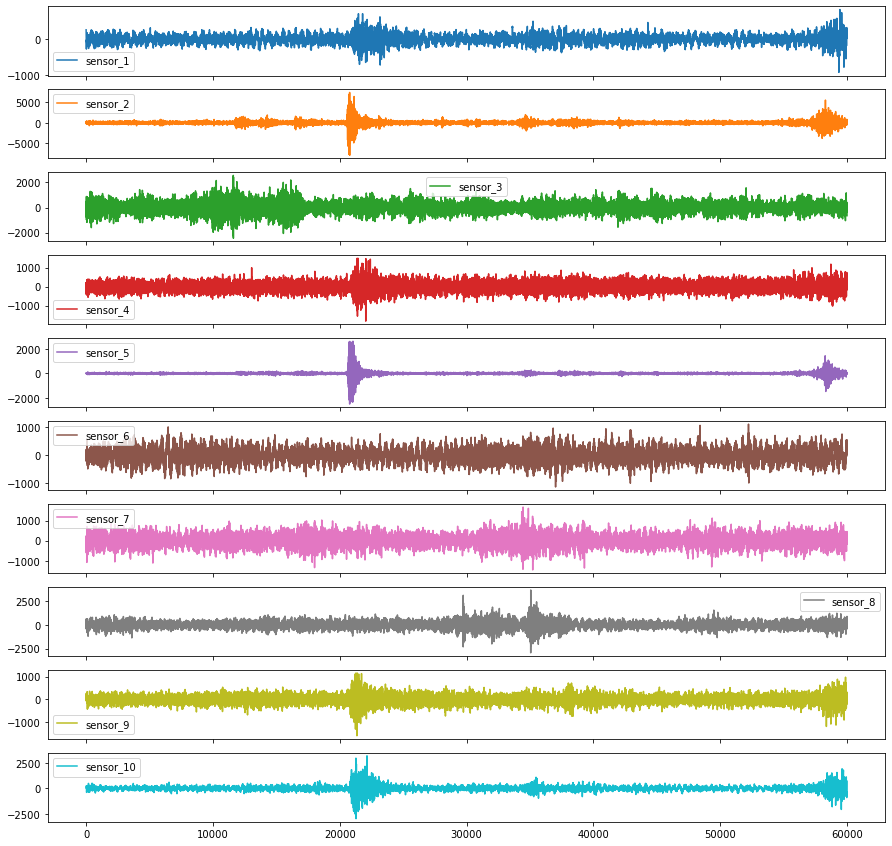

In [34]:
example.plot(figsize=(15,15), subplots=True);

In [35]:
train_time[train_time.segment_id == int(train_list[0].split('.')[0])]

,segment_id,time_to_eruption
1901,1000015382,16258654


In [36]:
pd.DataFrame(example.fillna(0).describe().iloc[1:, :].unstack()).reset_index()

,level_0,level_1,0
0,sensor_1,mean,0.382244
1,sensor_1,std,111.553322
2,sensor_1,min,-920.000000
3,sensor_1,25%,-66.000000
4,sensor_1,50%,0.000000
...,...,...,...
65,sensor_10,min,-2961.000000
66,sensor_10,25%,-117.000000
67,sensor_10,50%,0.000000
68,sensor_10,75%,119.000000


In [37]:
process = pd.DataFrame(example.fillna(0).describe().iloc[1:, :].unstack()).reset_index()
process = process.rename(columns={0: 'value'})
process['feature'] = process['level_0'] + '_' + process['level_1']

In [38]:
process

,level_0,level_1,value,feature
0,sensor_1,mean,0.382244,sensor_1_mean
1,sensor_1,std,111.553322,sensor_1_std
2,sensor_1,min,-920.000000,sensor_1_min
3,sensor_1,25%,-66.000000,sensor_1_25%
4,sensor_1,50%,0.000000,sensor_1_50%
...,...,...,...,...
65,sensor_10,min,-2961.000000,sensor_10_min
66,sensor_10,25%,-117.000000,sensor_10_25%
67,sensor_10,50%,0.000000,sensor_10_50%
68,sensor_10,75%,119.000000,sensor_10_75%


In [39]:
process = process.drop(['level_0', 'level_1'], axis=1).set_index('feature').T

In [40]:
process

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_2_mean,sensor_2_std,sensor_2_min,...,sensor_9_50%,sensor_9_75%,sensor_9_max,sensor_10_mean,sensor_10_std,sensor_10_min,sensor_10_25%,sensor_10_50%,sensor_10_75%,sensor_10_max
value,0.382244,111.553322,-920.0,-66.0,0.0,67.0,822.0,2.260746,451.161018,-7871.0,...,0.0,106.0,1162.0,0.896752,249.024286,-2961.0,-117.0,0.0,119.0,3179.0


In [41]:
process['time'] = train_time[train_time.segment_id == int(train_list[0].split('.')[0])].time_to_eruption.values[0]

In [42]:
process

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_2_mean,sensor_2_std,sensor_2_min,...,sensor_9_75%,sensor_9_max,sensor_10_mean,sensor_10_std,sensor_10_min,sensor_10_25%,sensor_10_50%,sensor_10_75%,sensor_10_max,time
value,0.382244,111.553322,-920.0,-66.0,0.0,67.0,822.0,2.260746,451.161018,-7871.0,...,106.0,1162.0,0.896752,249.024286,-2961.0,-117.0,0.0,119.0,3179.0,16258654


In [43]:
pd.DataFrame(example.fillna(0).skew()).T

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,-0.012046,0.022975,0.04275,0.03852,0.050072,0.033943,-0.017751,0.00181,-0.074676,0.058227


# Preprocessing Training and Test Data

In [44]:
def create_frame(data, data_time=None, type_data='train'):
    data = data.fillna(0)
    
    
    data_transform = data.describe().iloc[1:, :]
    
  
    data_transform.loc['skew'] = data.skew().tolist()
    
 
    data_transform.loc['mad'] = data.mad().tolist()
    
 
    data_transform.loc['kurtosis'] = data.kurtosis().tolist()
    
 
    for i in range(0, 100, 5):
        if ((i!=25) & (i!=50)):
                str_col = f"{i}%"
                int_col = float(i)/100
                data_transform.loc[str_col] = data_transform.quantile(int_col).tolist()
        else:
            continue
            
    data_transform = pd.DataFrame(data_transform.unstack()).reset_index()
    data_transform = data_transform.rename(columns={0: 'value'})
    data_transform['feature'] = data_transform['level_0'] + '_' + data_transform['level_1']
    data_transform = data_transform.drop(['level_0', 'level_1'], axis=1).set_index('feature').T
    
    if type_data=='train':
        data_transform['time'] = data_time
    return data_transform

In [45]:
all_train = pd.DataFrame()

for file in tqdm(train_list):
    df = pd.read_csv(PATH + 'train/' + file)
    data_time = train_time[train_time.segment_id == int(file.split('.')[0])].time_to_eruption.values[0]
    df = create_frame(df, data_time, type_data='train')
    all_train = all_train.append(df)

all_train = all_train.reset_index(drop=True)

100%|██████████| 4431/4431 [34:49<00:00,  2.12it/s] 


In [46]:
all_test = pd.DataFrame()

for file in tqdm(test_list):
    df = pd.read_csv(PATH + 'test/' + file)
    df = create_frame(df, data_time=None, type_data='test')
    all_test = all_test.append(df)

all_test = all_test.reset_index(drop=True)

100%|██████████| 4520/4520 [34:10<00:00,  2.20it/s]  


In [47]:
all_train[:5]

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_skew,sensor_1_mad,sensor_1_kurtosis,...,sensor_10_45%,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%,time
0,0.382244,111.553322,-920.0,-66.0,0.0,0.191122,822.0,-0.012046,83.790815,2.873691,...,-2961.0,-401.4,-70.200000,0.000000,0.040759,0.729047,8.641872,104.198722,227.687884,16258654
1,-3.828120,532.160723,-2039.0,-356.0,0.0,0.007484,2293.0,0.014968,421.908923,0.154876,...,-4329.0,-1071.9,-428.966671,-7.416676,-2.225003,0.003791,0.090567,501.139579,999.772613,6347792
2,8.291928,608.823318,-2193.0,-400.0,0.0,0.048726,2524.0,0.062943,484.108702,0.034508,...,-5040.0,-1224.9,-481.196783,-1.491958,-0.465423,-0.005096,0.106429,583.575907,1164.836378,5120693
3,2.071582,414.293195,-3112.0,-246.0,0.0,1.086726,4085.0,0.101869,311.949215,3.927669,...,-4634.0,-845.9,-255.549378,-1.373444,-0.448085,-0.010301,1.502831,330.199349,689.287538,10393161
4,0.904102,289.861921,-1723.0,-187.0,0.0,0.423557,1692.0,0.022172,225.736476,0.824943,...,-3909.0,-880.5,-326.400000,0.000000,0.262891,0.983665,18.137305,427.471846,853.571769,20549733


In [48]:
all_test[:5]

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_skew,sensor_1_mad,sensor_1_kurtosis,...,sensor_10_40%,sensor_10_45%,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%
0,4.462476,306.174474,-1319.0,-195.0,0.0,0.230194,1347.0,0.018572,239.780746,0.441816,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.838103,335.591100,-1268.0,-228.0,0.0,-0.005746,1214.0,-0.011491,269.067715,-0.097694,...,-2502.0,-2502.0,-600.3,-235.716168,-5.790420,-1.768148,-0.008863,0.095749,271.263834,539.798831
2,0.794903,352.172248,-3806.0,-193.0,0.0,0.397452,4259.0,-0.050056,254.199613,6.125681,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.953717,259.030122,-1156.0,-173.0,0.0,0.048986,1220.0,0.014705,206.508129,0.083266,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-3.984584,254.306426,-1111.0,-172.0,0.0,-0.038980,972.0,-0.077960,201.760901,0.058601,...,-2638.0,-2638.0,-578.8,-210.071319,-0.178297,-0.053489,0.001161,0.091708,249.965204,498.271876


# Modelling

In [49]:
X = all_train.drop('time',axis=1)
y = all_train['time']

test = all_test.copy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, shuffle=True, random_state=10)

In [51]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [52]:
clf = CatBoostRegressor(loss_function='MAPE')  
train_dataset = Pool(data=X_train,
                     label=y_train,
                     )
    
eval_dataset = Pool(data=X_val,
                    label=y_val,
                    )
    
clf.fit(train_dataset,
          use_best_model=True,
          verbose = 0,
          eval_set=eval_dataset)

In [53]:
y_pred = clf.predict(Pool(data=X_test))
    
print(f"MAPE: {mape(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAPE: 0.9907361820851471
MAE: 16982653.123583514
RMSE: 20823436.660676762


# USING KFOLD with some parameters

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=10)

In [55]:
n_fold = 5
cv = KFold(n_splits=n_fold, shuffle=True, random_state=10)
prediction = np.zeros(len(test))
mape_, mae, rmse = [], [], []

params = {
            'iterations':1000,
            'learning_rate':0.1,
            'depth':6,
            'eval_metric':'RMSE'
}

for fold, (train_index, val_index) in enumerate(cv.split(X)):
    X_train = X.iloc[train_index,:]
    X_val = X.iloc[val_index,:]

    y_train = y.iloc[train_index]
    y_val = y.iloc[val_index]
          
    clf = CatBoostRegressor(**params)  
    
    train_dataset = Pool(data=X_train,
                     label=y_train,
                     )
    
    eval_dataset = Pool(data=X_val,
                    label=y_val,
                    )
    
    clf.fit(train_dataset,
              use_best_model=True,
              verbose = 0,
              eval_set=eval_dataset)
   
    y_pred = clf.predict(Pool(data=X_test))
    
    mape_.append(mape(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    print(f"fold: {fold}, MAPE: {mape(y_test, y_pred)}")
    print(f"fold: {fold}, MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"fold: {fold}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

    # test array predictions
    prediction += clf.predict(Pool(data=test))
        
prediction /= n_fold

print('CV mean MAPE:  {0:.4f}, std: {1:.4f}.'.format(np.mean(mape_), np.std(mape_)))
print('CV mean MAE: {0:.4f}, std: {1:.4f}.'.format(np.mean(mae), np.std(mae)))
print('CV mean RMSE: {0:.4f}, std: {1:.4f}.'.format(np.mean(rmse), np.std(rmse)))

fold: 0, MAPE: 0.9190171145340206
fold: 0, MAE: 3816792.941368518
fold: 0, RMSE: 5429265.979534433
fold: 1, MAPE: 0.2670953892386867
fold: 1, MAE: 1544988.447836252
fold: 1, RMSE: 3138974.458073899
fold: 2, MAPE: 0.14692275063532995
fold: 2, MAE: 685867.9787715108
fold: 2, RMSE: 901660.1106931572
fold: 3, MAPE: 0.11104972003513114
fold: 3, MAE: 635471.558969995
fold: 3, RMSE: 835510.8065141749
fold: 4, MAPE: 0.15017256679172034
fold: 4, MAE: 667802.263484478
fold: 4, RMSE: 875880.4610708419
CV mean MAPE:  0.3189, std: 0.3047.
CV mean MAE: 1470184.6381, std: 1222119.6472.
CV mean RMSE: 2236258.3632, std: 1822309.9756.


In [62]:
sub_example = pd.read_csv(PATH + 'sample_submission.csv')
sub_example[:5]

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [57]:
test_index = [int(i.split('.')[0]) for i in test_list]

In [58]:
test_index[:5]

[1000213997, 100023368, 1000488999, 1001028887, 1001857862]

In [59]:
submission = pd.DataFrame()
submission['segment_id'] = test_index
submission['time_to_eruption'] = prediction
submission.to_csv('submission.csv', header=True, index=False)

In [60]:
submission[:5]

,segment_id,time_to_eruption
0,1000213997,1.823058e+07
1,100023368,3.177255e+07
2,1000488999,2.334482e+07
3,1001028887,2.358660e+07
4,1001857862,2.060236e+07
